# 🌌 Tentando algo diferente

Guerreiros da missão: **Tsuru** (Júlia Guedes Almeida dos Santos), **Pólux** (Raquel de Godoy Vianna) e **Tiles** (Thalles José de Souza Cansi).

> Macaco velho não põe a mão na cumbuca

## 🖼️ Enunciado

Escolha um dos seguintes algoritmos de aprendizado de máquina: Support Vector Machine, Naive Bayes ou Gaussian Proccesses. Sua tarefa é entender como este algoritmo funciona e reportar isso de maneira clara e didática. Induza um modelo utilizando este algoritmo nos dados que pretende usar no seu projeto de conclusão do semestre desta disciplina.

## 📝 Introdução

Neste desafio, os cavaleiros da Aliança da Supernova estão explorando um novo algoritmo de aprendizado de máquina: o **Support Vector Machine (SVM)**. Esse algoritmo é amplamente utilizado e eficaz em tarefas de classificação e regressão, principalmente quando há um grande número de dimensões nos dados.

Nosso objetivo é entender como o SVM funciona e aplicá-lo para resolver um problema prático. Nesta missão, utilizaremos uma variação do SVM chamada **Support Vector Regression (SVR)**, que é voltada para problemas de regressão, onde o objetivo é prever valores contínuos, e não classificar dados em categorias distintas.

## 📚 Support Vector Machine (SVM)

O Support Vector Machine (SVM) é um algoritmo de aprendizado supervisionado que busca encontrar um hiperplano ideal para separar classes em um espaço N-dimensional. Em problemas de classificação linear, o SVM determina uma linha (ou um plano em dimensões mais altas) que separa os dados de forma otimizada. O objetivo principal é maximizar a margem entre as classes, ou seja, a distância entre os pontos mais próximos de cada classe e o hiperplano. [1]

<p align="center">
  <img style="width: 500px;" src="images/Svm separating hyperplanes.svg">
</p>


Imagem 1: A reta ótima (H3) é a mais distante dos dois grupos, considerando apenas os pontos de cada grupo mais próximos à reta (como indicado pelas linhas cinzas). Fonte: [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Svm_separating_hyperplanes(SVG).svg).

O SVM é especialmente eficaz em situações onde o número de dimensões é maior que o número de amostras. Além disso, utiliza apenas um subconjunto dos dados de treinamento (os vetores de suporte), tornando-o eficiente em termos computacionais [2].

A ideia central do SVM é encontrar um **hiperplano** que divida os pontos de dados em classes distintas. Em um problema de classificação linear, os dados podem ser separados em duas classes por uma linha (ou plano no caso de mais dimensões).

No entanto, existem muitos hiperplanos possíveis que poderiam separar os dados. O **SVM escolhe o hiperplano que maximiza a margem** — a distância entre os pontos mais próximos de cada classe (chamados de **vetores de suporte**) e o hiperplano.

A **margem** é a distância entre o hiperplano e os pontos mais próximos de qualquer classe. O SVM tenta maximizar essa margem para garantir uma boa separação entre as classes, de modo que o modelo generalize bem em novos dados.

Em termos simples, o hiperplano é a linha de separação entre classes. Existem muitos hiperplanos possíveis, mas o SVM escolhe aquele que maximiza a margem, garantindo uma melhor separação entre as classes. Os pontos de dados mais próximos ao hiperplano são chamados de vetores de suporte e são fundamentais para determinar a posição do hiperplano.

A equação de um hiperplano em um espaço de dimensão $ d $ é dada por:

$$
w \cdot x + b = 0
$$

Onde:

$ w $ é o vetor de pesos normais ao hiperplano.

$ x $ é o vetor de características (amostras).

$ b $ é o termo de bias.

<p align="center">
  <img style="width: 500px" src="images/hyperplanes and line.png">
</p>

Imagem 2: Visualizando a separação de hiperplanos em um SVM. Fonte: [Medium](https://medium.com/turing-talks/turing-talks-12-classifica%C3%A7%C3%A3o-por-svm-f4598094a3f1)

Os pontos de dados mais próximos do hiperplano são chamados de **vetores de suporte**. Eles são críticos, pois definem a posição do hiperplano e a margem. Sem esses vetores de suporte, o hiperplano pode mudar de posição, e o modelo não teria uma boa generalização.

Os vetores de suporte são os pontos que têm a menor margem entre eles e o hiperplano, e estes são utilizados para **ajustar o hiperplano** durante o treinamento [3].

Se os dados forem linearmente separáveis, o SVM consegue encontrar um hiperplano que os separe perfeitamente. Porém, muitos problemas reais têm dados que não podem ser separados linearmente. Para isso, o SVM utiliza uma técnica chamada **kernel trick**.

Nem sempre os dados podem ser separados linearmente. Para esses casos, o SVM utiliza uma técnica chamada Kernel Trick, que transforma os dados de um espaço de baixa dimensionalidade para um espaço de dimensões mais altas, onde a separação linear é possível. Alguns dos kernels mais utilizados são [4]:

- **Kernel linear:** usado quando os dados são linearmente separáveis.
- **Kernel polinomial:** mapeia os dados para uma dimensão mais alta utilizando polinômios.
- **Kernel RBF (Radial Basis Function):** usado para dados mais complexos, onde as fronteiras de decisão são não-lineares (também conhecido como kernel gaussiano).

O kernel RBF, em especial, é poderoso para capturar padrões complexos, tornando o SVM uma ferramenta eficaz para problemas de classificação e regressão não-linear.

**Vantagens do SVM:**
- Funciona bem com margens claras de separação.
- Eficaz em espaços de alta dimensionalidade.
- Ainda eficaz mesmo com poucos exemplos de treinamento.

**Desvantagens do SVM:**
- Não é eficiente com grandes conjuntos de dados (por exemplo, milhões de amostras).
- Não funciona bem quando há muita sobreposição entre as classes.
- Escolher o kernel e os parâmetros corretos pode ser desafiador.

Para essa missão, nós, guerreiros da Aliança da Supernova, utilizaremos o SVR (Support Vector Regression) para induzir um modelo nos dados que pretendemos usar em nosso projeto de conclusão do semestre. O SVR é uma variação do SVM que é usada para problemas de regressão, em vez de classificação. Ele será utilizado para prever valores contínuos em vez de classes, pois nosso problema é de regressão.

## 🗡️ Que comecem os códigos!

### 📚 Importação de bibliotecas

Os cavaleiros importam as bibliotecas essenciais para a execução do código!

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import root_mean_squared_error, make_scorer, mean_squared_error
from sklearn.model_selection import cross_val_score

### ⚛️ Importação do Dataset

Antes de começar, devemos importar o conjunto de dados com o qual iremos trabalhar.

In [2]:
df = pd.read_csv(f"../data/train.csv", sep = ',')
df = df.dropna()
display(df)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


Só relembrando aquilo que já foi demonstrado anteriormente: o dataset com o qual estamos trabalhando não apresenta valores faltantes!

### 🗂️Treino ou teste?

Para, posteriormente, realizar uma análise da eficiência do modelo é essencial separarmos o dataframe em dados de **treino** (90% do dataset original) e dados **teste** (os 10% restantes). Isso foi feito por meio da função ``train_test_split`` do módulo ``scikit-learn``. 

In [3]:
tamanho_teste = 0.1
seed = 314159

indices = df.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=tamanho_teste, random_state=seed, shuffle=True
)

df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

Agora, definiremos X_treino e y_treino, bem como o X_teste e o y_teste, isto é, quais os atributos (x) e qual o target (y). Nesse sentido, o target será a temperatura crítica, enquanto os atributos serão as colunas restantes. Para isso, inicialmente, foi definida uma lista com os nomes das colunas do dataframe para facilitar o processo.

In [4]:
lista_colunas = list(df.columns)

target = [lista_colunas.pop(81)]
atributos = lista_colunas

y_treino = df_treino[target]
X_treino = df_treino[atributos]

y_teste = df_teste[target]
X_teste = df_teste[atributos]

## 🤌🏼 Utilizando o modelo SVM

Bom, agora que já entendemos o que é o SVM e como ele funciona, e também já feito as separações dos dados de treino e teste, podemos finalmente aplicar o modelo SVM nos dados.

In [5]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVR(kernel='rbf', C=100))
])

pipeline.fit(X_treino, y_treino.values.ravel())

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVR(C=100))])

O parâmetro ``C`` para o SVR é um hiperparâmetro que controla a penalidade por erro. Quanto maior o valor de C, menor a margem de erro permitida. 

$$
C \sum_{i=1, n} \mathcal{L} (f(x_i), y_i) + \Omega (w)
$$

onde:

- $\mathcal{L}$ é uma *loss* função de nossas amostras e dos parâmetros do nosso modelo.
- $\Omega$ é uma *penalty* função dos parâmetros do nosso modelo.
- $C$ é usado para definir a quantidade de regularização.

Se considerarmos a função de perda como o erro individual por amostra, então o termo de ajuste de dados, ou a soma do erro para cada amostra, aumenta à medida que adicionamos mais amostras. O termo de penalização, no entanto, não aumenta.

Realizado o treinamento do modelo, é possível fazer a previsão da temperatura crítica para os dados de teste. Para isso, utilizamos a função ``predict`` do modelo SVM.

In [6]:
pipeline.fit(X_treino, y_treino.values.ravel())

X_verdadeiro = X_teste
y_verdadeiro = y_teste.values.ravel()

y_previsto = pipeline.predict(X_verdadeiro)

RMSE = root_mean_squared_error(y_verdadeiro, y_previsto)

print(f"O RMSE do modelo foi de {RMSE} K.")

O RMSE do modelo foi de 13.43750114592263 K.


Com o cálculo do RMSE, é possível avaliar a eficiência do modelo. O RMSE é uma métrica que indica o quão bem o modelo se ajusta aos dados. Quanto menor o valor do RMSE, melhor o modelo.

Neste caso, podemos observar que o RMSE foi de aproximadamente 13.43, que não é o melhor modelos que a guilda dos cavaleiros já viu, mas também não é o pior.

Realizando a validação cruzada, é possível obter uma estimativa mais precisa da eficiência do modelo. A validação cruzada é uma técnica que divide o conjunto de dados em partes menores e treina o modelo em várias combinações dessas partes.

In [7]:
k = 5

scorer = make_scorer(root_mean_squared_error)

scores = cross_val_score(pipeline, X_treino, y_treino.values.ravel(), cv=k, scoring=scorer)

print(f'RMSE médio: {scores.mean():.2f} K')

RMSE médio: 13.37 K


Nessa validação cruzada dividindo o conjunto de dados em 5 partes, o modelo SVM obteve um RMSE médio de aproximadamente 13.37. Isso indica que o modelo é relativamente consistente em diferentes divisões dos dados.

## 📝 Conclusão

Para concluirmos sobre o modelo SVM, podemos dizer que ele é um algoritmo bom para classificação de dados, especialmente em problemas de alta dimensionalidade. O SVM é eficaz em encontrar hiperplanos que separam as classes de forma clara, maximizando a margem entre elas. Vamos tentar visualizar o modelo SVM em um gráfico para entender melhor como ele separa as classes.

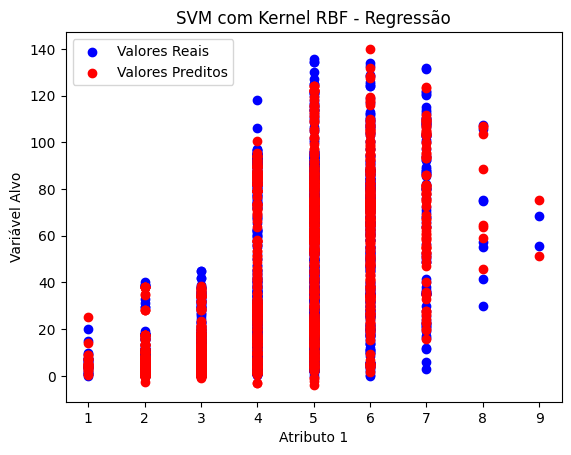

In [8]:
import matplotlib.pyplot as plt

atributo_unico = X_teste.iloc[:, 0]

pipeline.fit(X_treino, y_treino.values.ravel())

y_previsto = pipeline.predict(X_teste)

plt.scatter(atributo_unico, y_teste, color='blue', label='Valores Reais')
plt.scatter(atributo_unico, y_previsto, color='red', label='Valores Preditos')
plt.xlabel('Atributo 1')
plt.ylabel('Variável Alvo')
plt.title('SVM com Kernel RBF - Regressão')
plt.legend()
plt.show()


Este gráfico pode parecer diferente do que foi mostrado anteriormente, mas ele ilustra como o modelo SVM com kernel RBF funciona em um cenário de regressão. Ao invés de traçar planos ou linhas para separar classes, como em problemas de classificação, o kernel RBF permite que o modelo capture padrões complexos e não-lineares nos dados. Como estamos lidando com um espaço de alta dimensionalidade, não é possível visualizar a separação através de um simples hiperplano ou linha reta.

No contexto de regressão, o objetivo não é separar dados em classes distintas, mas sim prever um valor contínuo. Por isso, o modelo ajusta uma função aos dados que pode se curvar e se adaptar a padrões mais sutis. O kernel RBF é particularmente eficaz em ajustar essa função complexa, resultando em uma superfície preditiva mais flexível. Essa flexibilidade permite ao modelo adaptar-se melhor às nuances dos dados, ajustando-se de forma não-linear aos valores reais, como mostrado pelos pontos no gráfico.

## 🖇️ Referências

[1] IBM. “What Is Support Vector Machine? | IBM.” Www.ibm.com, 27 Dec. 2023, www.ibm.com/topics/support-vector-machine.

[2] “1.4. Support Vector Machines.” Scikit-Learn, 2024, scikit-learn.org/1.5/modules/svm.html.

[3] “Support Vector Machine.” Wikipedia, 4 Nov. 2023, en.wikipedia.org/wiki/Support_vector_machine#.

[4] Coutinho, Bernardo. “Modelos de Predição | SVM.” Turing Talks, 9 June 2020, [medium.com/turing-talks/turing-talks-12-classifica%C3%A7%C3%A3o-por-svm-f4598094a3f1.](https://medium.com/turing-talks/turing-talks-12-classifica%C3%A7%C3%A3o-por-svm-f4598094a3f1)